## The Sparks Foundation 
## Rupankar Mitra 
## Task-2
## Predicting The Optimum Number of Clusters in Iris Dataset
## Problem Statement 
from given iris dtaset , predict optimum number of clusters and represent it visually

In [1]:
#importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets 

In [3]:
#loading the dataset 
iris=datasets.load_iris()
iris_df= pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#using wcss method to notice the distance between centroid and datapoints with diffrent number of cluster 

C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

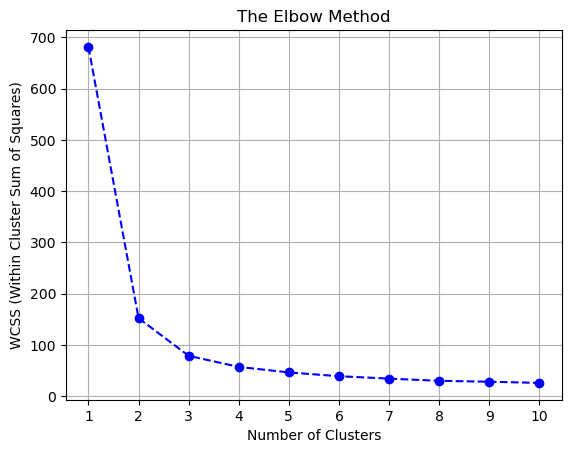

In [8]:
from sklearn.cluster import KMeans

# Selecting relevant columns for clustering
x = iris_df.iloc[:, [0, 1, 2, 3]].values

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Test different numbers of clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plotting the results using the elbow method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(np.arange(1, 11, 1))  # Set x-axis ticks from 1 to 10
plt.grid(True)
plt.show()


using " the elbow method' we can see that the within cluster sum of square(WCSS) doesn't reduce significantly so, we chose the '3' as optimum number of cluster 

C:\Users\2022r\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


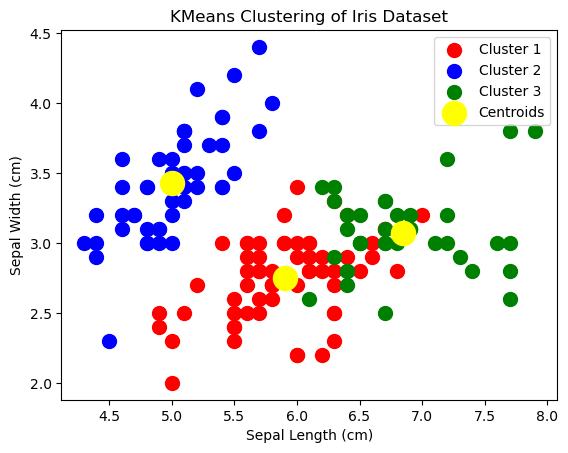

In [9]:
# Selecting relevant columns for clustering
x = iris_df.iloc[:, [0, 1, 2, 3]].values

# Creating a KMeans clustering object
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fitting the KMeans model and predicting cluster labels
y_kmeans = kmeans.fit_predict(x)

# Visualizing the clusters (example plot)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Adding labels, title, and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()
